# Do These Results Matter - Python scripts
__Gustavo A. Patino__  
December 2025 

Jupyter notebook with the scripts used to analyze data and create figures for the paper "Do These Results Matter? A Survey Study of Medical Educators to Define Practical Significance Thresholds", submitted to the 2026 AAMC RIME 

- Load libraries and setup figure settings

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
sns.set()
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette('Greys')

- Load Excel file with survey results from medical educators into a dataframe (replace _filename_ for the name of the file)
- List the columns in the dataframe

In [3]:
df = pd.read_excel('filename.xlsx')
df.columns

Index(['Record ID', 'Consent', 'TeachUME', 'Gender', 'Race', 'Country',
       'Academic_position', 'other_position', 'Primary_role', 'other_role',
       'Discipline', 'Students', 'other_students', 'Course_leadership',
       'Clerkship_leadership', 'Program_leadership', 'Curriculum_leadership',
       'Committee_leadership', 'Dean', 'other_leadership',
       'other_leadership_which', 'MD', 'DO', 'MBBS', 'MBChB', 'MB BCh',
       'other_program', 'other_program_which', 'Institution', 'Licensing_body',
       'Professional_society', 'Commercial_company', 'other_write_questions',
       'other_write_questions_which', 'Class_average', 'Percentage_higher',
       'Percentage_fail', 'National_exam_sd', 'National_percentile',
       'Course_eval', 'Class_average_importance', 'Percentage_high_importance',
       'Percentage_fail_importance', 'National_exam_sd_importance',
       'National_percentile_importance', 'course_eval_importance', 'total',
       'text_comments', 'Complete?'],
      

- Display counts for categories in each column and their percentages (replace _columnname_ for the name of the column of interest)

In [ ]:
print(df.columnname.value_counts(dropna=False))
print('\n')
print(df.columnname.value_counts(normalize=True, dropna=False))

- Items about educational outcomes in the survey asked respondents to answer what new values of the outcome would signal a successful change from a new educational intervention. Create a new dataframe with the minimally important differences for the outcomes by substracting the proposed new value from the historical one provided in the question stem
- Remove differences of 0 from the new dataframe for a missing value (`np.nan`) because a minimally important difference of 0 can't be interpreted. That way when descriptive statistics are calculated those values of 0 are ignored  

In [ ]:
df_differences = pd.DataFrame({'Class_average': df.Class_average - 82, 
                               'Percentage_higher': df.Percentage_higher - 20,
                               'Percentage_fail': 5 - df.Percentage_fail, 
                               'National_exam_sd': df.National_exam_sd, 
                               'National_percentile': df.National_percentile - 50,
                               'Course_eval': df.Course_eval - 3}).replace(0, np.nan)

- Calculate descriptive statistics for the proposed minimally important differences of each outcome

In [17]:
df_differences.describe()

,Class_average,Percentage_higher,Percentage_fail,National_exam_sd,National_percentile,Course_eval
count,112.000000,105.000000,85.000000,106.000000,116.000000,115.000000
mean,5.589286,13.285714,2.729412,2.009434,17.827586,0.900000
std,2.749459,15.194707,1.228513,1.222763,8.789595,0.387298
min,2.000000,1.000000,1.000000,1.000000,1.000000,0.500000
25%,3.000000,5.000000,2.000000,1.000000,10.000000,0.500000
50%,5.000000,10.000000,3.000000,2.000000,20.000000,1.000000
75%,8.000000,15.000000,3.000000,3.000000,25.000000,1.000000
max,14.000000,73.000000,5.000000,6.000000,36.000000,2.000000


- The `.describe()` methods of the dataframe does not include the mode, it needs to be calculated separately

In [331]:
df_differences.mode()

,Class_average,Percentage_higher,Percentage_fail,National_exam_sd,National_percentile,Course_eval
0,3.0,5.0,3.0,1.0,25.0,0.5


- The same analysis was done for data from psychometricians and measurement science specialists working in medical education

In [ ]:
df_psych = pd.read_excel('filename2.xlsx')
df_psych_differences = pd.DataFrame({'Class_average': df_psych.Class_average - 82, 
                                     'Percentage_higher': df_psych.Percentage_higher - 20,
                                     'Percentage_fail': 5 - df_psych.Percentage_fail, 
                                     'National_exam_sd': df_psych.National_exam_sd, 
                                     'National_percentile': df_psych.National_percentile - 50,
                                     'Course_eval': df_psych.Course_eval - 3}).replace(0, np.nan)

- Descriptive statistics of the psychometricians and measurement science specialists data

In [22]:
df_psych_differences.describe()

,Class_average,Percentage_higher,Percentage_fail,National_exam_sd,National_percentile,Course_eval
count,3.000000,2.000000,4.000000,3.0,4.000000,4.000
mean,4.333333,7.500000,3.000000,1.0,12.000000,0.625
std,1.154701,3.535534,1.632993,0.0,9.556847,0.250
min,3.000000,5.000000,1.000000,1.0,2.000000,0.500
25%,4.000000,6.250000,2.500000,1.0,8.000000,0.500
50%,5.000000,7.500000,3.000000,1.0,10.500000,0.500
75%,5.000000,8.750000,3.500000,1.0,14.500000,0.625
max,5.000000,10.000000,5.000000,1.0,25.000000,1.000


In [337]:
df_psych_differences.mode()

,Class_average,Percentage_higher,Percentage_fail,National_exam_sd,National_percentile,Course_eval
0,5.0,5.0,3.0,1.0,2.0,0.5
1,NaN,10.0,NaN,NaN,10.0,NaN
2,NaN,NaN,NaN,NaN,11.0,NaN
3,NaN,NaN,NaN,NaN,25.0,NaN


- Create the figure with swarmplots for the results of each outcome comparing both experimental groups
- Each of the six panels is plotted separately
- Superimpose the mean (diamond), median (triangle) and IQR (vertical line) 

/Applications/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.12/site-packages/seaborn/categor

<Figure size 640x480 with 0 Axes>

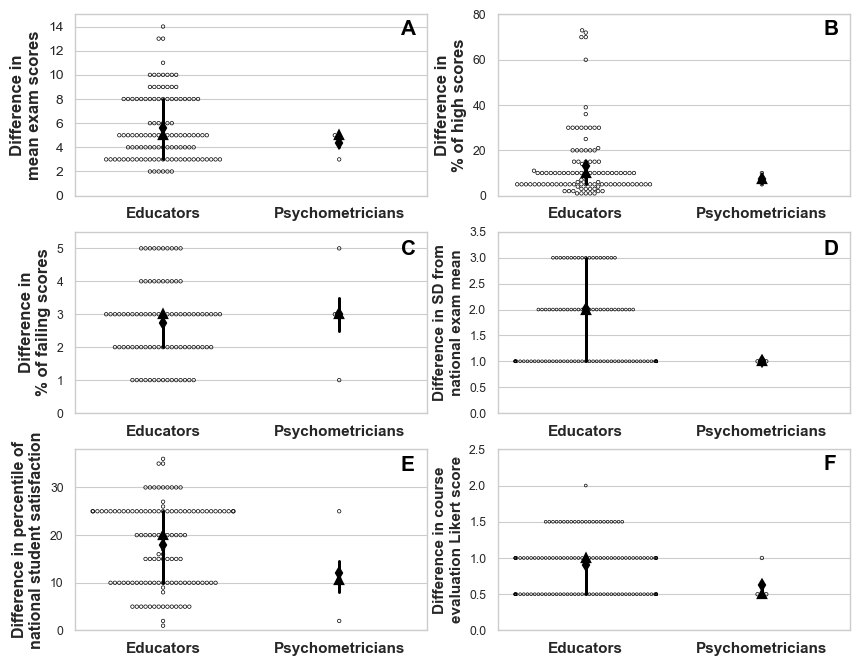

In [166]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

#First panel: Change in class mean score
sns.swarmplot(x=1, y=df_differences.Class_average, size=2.5,facecolor='none', edgecolor='black',
              linewidth=0.5, alpha=1, ax=axes[0, 0])
sns.swarmplot(x=2, y=df_psych_differences.Class_average, size=2.5, facecolor='none', edgecolor='black', 
              linewidth=0.5, alpha=1, ax=axes[0, 0])
sns.pointplot(x=1, y=df_differences.Class_average, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[0, 0])
sns.pointplot(x=1, y=df_differences.Class_average, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[0, 0])
sns.pointplot(x=2, y=df_psych_differences.Class_average, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[0, 0])
sns.pointplot(x=2, y=df_psych_differences.Class_average, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[0, 0])
axes[0, 0].set_ylim(0, 15)
axes[0, 0].set_ylabel('Difference in\nmean exam scores', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks([0,1], ['Educators', 'Psychometricians'], fontsize=11, fontweight='bold')
axes[0, 0].set_yticks([0, 2, 4, 6, 8, 10, 12, 14], [0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)
axes[0, 0].text(1.35, 13.3, 'A', color='black', fontsize=15, weight='bold')

#Second panel: Change in percentage of students with high scores
sns.swarmplot(x=1, y=df_differences.Percentage_higher, size=2.5,facecolor='none', edgecolor='black',
              linewidth=0.5, alpha=1, ax=axes[0, 1])
sns.swarmplot(x=2, y=df_psych_differences.Percentage_higher, size=2.5, facecolor='none', edgecolor='black', 
              linewidth=0.5, alpha=1, ax=axes[0, 1])
sns.pointplot(x=1, y=df_differences.Percentage_higher, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[0, 1])
sns.pointplot(x=1, y=df_differences.Percentage_higher, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[0, 1])
sns.pointplot(x=2, y=df_psych_differences.Percentage_higher, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[0, 1])
sns.pointplot(x=2, y=df_psych_differences.Percentage_higher, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[0, 1])
axes[0, 1].set_ylim(0, 80)
axes[0, 1].set_ylabel('Difference in\n% of high scores', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks([0,1], ['Educators', 'Psychometricians'], fontsize=11, fontweight='bold')
#axes[0, 1].set_yticks([0, 2, 4, 6, 8, 10, 12, 14], [0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)
axes[0, 1].text(1.35, 71, 'B', color='black', fontsize=15, weight='bold')

#Third panel: Change in percentage of students failing
sns.swarmplot(x=1, y=df_differences.Percentage_fail, size=2.5,facecolor='none', edgecolor='black',
              linewidth=0.5, alpha=1, ax=axes[1, 0])
sns.swarmplot(x=2, y=df_psych_differences.Percentage_fail, size=2.5, facecolor='none', edgecolor='black', 
              linewidth=0.5, alpha=1, ax=axes[1, 0])
sns.pointplot(x=1, y=df_differences.Percentage_fail, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[1, 0])
sns.pointplot(x=1, y=df_differences.Percentage_fail, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[1, 0])
sns.pointplot(x=2, y=df_psych_differences.Percentage_fail, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[1, 0])
sns.pointplot(x=2, y=df_psych_differences.Percentage_fail, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[1, 0])
axes[1, 0].set_ylim(0, 5.5)
axes[1, 0].set_ylabel('Difference in\n% of failing scores', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks([0,1], ['Educators', 'Psychometricians'], fontsize=11, fontweight='bold')
#axes[1, 0].set_yticks([0, 1, 2, 3, 4, 5], [[0, 1, 2, 3, 4, 5], fontsize=10)
axes[1, 0].text(1.35, 4.8, 'C', color='black', fontsize=15, weight='bold')

#Fourth panel: Change in national exam SD
sns.swarmplot(x=1, y=df_differences.National_exam_sd, size=2,facecolor='none', edgecolor='black',
              linewidth=0.5, alpha=1, ax=axes[1, 1])
sns.swarmplot(x=2, y=df_psych_differences.National_exam_sd, size=2.5, facecolor='none', edgecolor='black', 
              linewidth=0.5, alpha=1, ax=axes[1, 1])
sns.pointplot(x=1, y=df_differences.National_exam_sd, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[1, 1])
sns.pointplot(x=1, y=df_differences.National_exam_sd, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[1, 1])
sns.pointplot(x=2, y=df_psych_differences.National_exam_sd, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[1, 1])
sns.pointplot(x=2, y=df_psych_differences.National_exam_sd, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[1, 1])
axes[1, 1].set_ylim(0, 3.5)
#axes[1, 1].set_ylim(-0.5, 3.5)
axes[1, 1].set_ylabel('Difference in SD from\nnational exam mean', fontsize=11, fontweight='bold')
axes[1, 1].set_xticks([0, 1], ['Educators', 'Psychometricians'], fontsize=11, fontweight='bold')
#axes[1, 1].set_yticks([0, 1, 2, 3], [[0, 1, 2, 3], fontsize=10)
axes[1, 1].text(1.35, 3.05, 'D', color='black', fontsize=15, weight='bold')

#Fifth panel: Change in national student satisfaction percentile 
sns.swarmplot(x=1, y=df_differences.National_percentile, size=2.5,facecolor='none', edgecolor='black',
              linewidth=0.5, alpha=1, ax=axes[2, 0])
sns.swarmplot(x=2, y=df_psych_differences.National_percentile, size=2.5, facecolor='none', edgecolor='black', 
              linewidth=0.5, alpha=1, ax=axes[2, 0])
sns.pointplot(x=1, y=df_differences.National_percentile, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[2, 0])
sns.pointplot(x=1, y=df_differences.National_percentile, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[2, 0])
sns.pointplot(x=2, y=df_psych_differences.National_percentile, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[2, 0])
sns.pointplot(x=2, y=df_psych_differences.National_percentile, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[2, 0])
axes[2, 0].set_ylim(0, 38)
axes[2, 0].set_ylabel('Difference in percentile of\nnational student satisfaction', fontsize=11.5, fontweight='bold')
axes[2, 0].set_xticks([0,1], ['Educators', 'Psychometricians'], fontsize=11, fontweight='bold')
#axes[2, 0].set_yticks([0, 5, 10, 15, 20, 25], [0, 5, 10, 15, 20, 25], fontsize=10)
axes[2, 0].text(1.35, 33.5, 'E', color='black', fontsize=15, weight='bold')

#Sixth panel: Change in course evaluation Likert score 
sns.swarmplot(x=1, y=df_differences.Course_eval, size=2,facecolor='none', edgecolor='black',
              linewidth=0.5, alpha=1, ax=axes[2, 1])
sns.swarmplot(x=2, y=df_psych_differences.Course_eval, size=2.5, facecolor='none', edgecolor='black', 
              linewidth=0.5, alpha=1, ax=axes[2, 1])
sns.pointplot(x=1, y=df_differences.Course_eval, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[2, 1])
sns.pointplot(x=1, y=df_differences.Course_eval, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[2, 1])
sns.pointplot(x=2, y=df_psych_differences.Course_eval, 
              estimator='mean', errorbar=None, markers="d", color="black", linestyles="none", alpha=1, ax=axes[2, 1])
sns.pointplot(x=2, y=df_psych_differences.Course_eval, 
              estimator='median', errorbar=("pi",50), markers="^", color="black", linestyles="none", alpha=1, ax=axes[2, 1])
axes[2, 1].set_ylim(0, 2.5)
axes[2, 1].set_ylabel('Difference in course\nevaluation Likert score', fontsize=11, fontweight='bold')
axes[2, 1].set_xticks([0,1], ['Educators', 'Psychometricians'], fontsize=11, fontweight='bold')
#axes[2, 1].set_yticks([0, 5, 10, 15, 20, 25], [0, 5, 10, 15, 20, 25], fontsize=10)
axes[2, 1].text(1.35, 2.21, 'F', color='black', fontsize=15, weight='bold')

plt.savefig('differences_plot.jpg', dpi=600, bbox_inches='tight')

plt.show();

- Save image as a JPEG file

In [165]:
plt.savefig('differences_plot.jpg', dpi=600, bbox_inches='tight')

- Create heatmap of the correlations between all outcomes data in the educators group

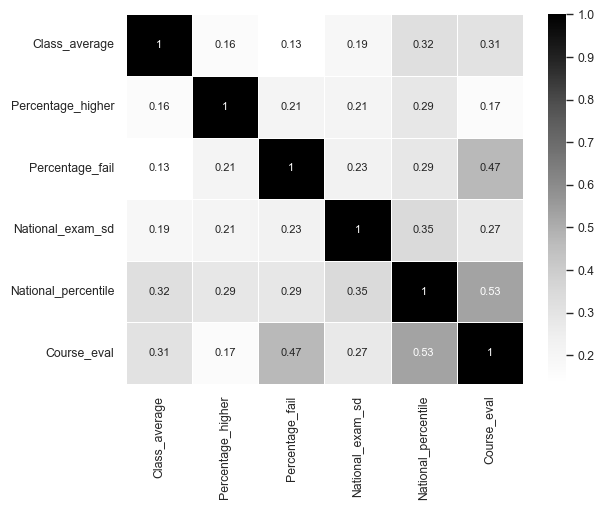

In [151]:
sns.heatmap(df_differences.corr(), 
            cmap="Greys", annot=True, annot_kws={"size":8}, linewidth=.5)
plt.show();

- Create scatter matrix of each outcome pairs, with the KDE for the outcomes on the diagonal

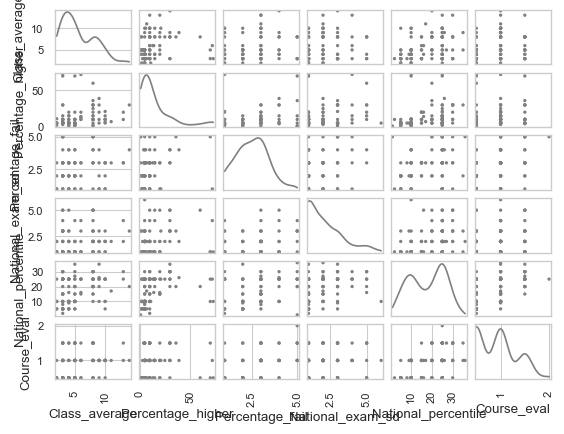

In [189]:
axes = pd.plotting.scatter_matrix(df_differences, grid=False, alpha=1, diagonal='kde', color='grey', density_kwds={'color': 'grey'})
fig = axes[0, 0].get_figure()
fig.subplots_adjust(hspace=0.15, wspace=0.1)
plt.show();

### Create the Choropleth map

- The choropleth map used as template the Countries file from the Natural Earth website __[https://www.naturalearthdata.com/downloads/110m-cultural-vectors/](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/)__ downloaded as a Zip file and read as a Geopandas dataframe

In [ ]:
import geopandas
world = geopandas.read_file("ne_110m_admin_0_countries.zip")

- Create new dataframe with the number of responses per country from the original dataframe with the educators responses

In [ ]:
df_country_counts = pd.DataFrame({'Country': df.Country.value_counts(dropna=True).index,
                                  'Responses': df.Country.value_counts(dropna=True).values})

- Change country names in the `df_country_counts` dataframe to match those in the `world` Geopandas dataframe

In [ ]:
df_country_counts.replace({"GerMany":"Germany", "United States":"United States of America"}, inplace=True)

- Add the column with the number of responses per country in the `df_country_counts` dataframe to the `world` one
- Countries without any responses are assigned 0 in the new column of the `world` Geopandas dataframe

In [247]:
world = world.merge(df_country_counts, how='left', left_on=['ADMIN'], right_on=['Country'])
world['Responses'] = world['Responses'].fillna(0)

- Display the choropleth map of number of responses per country using specified binning

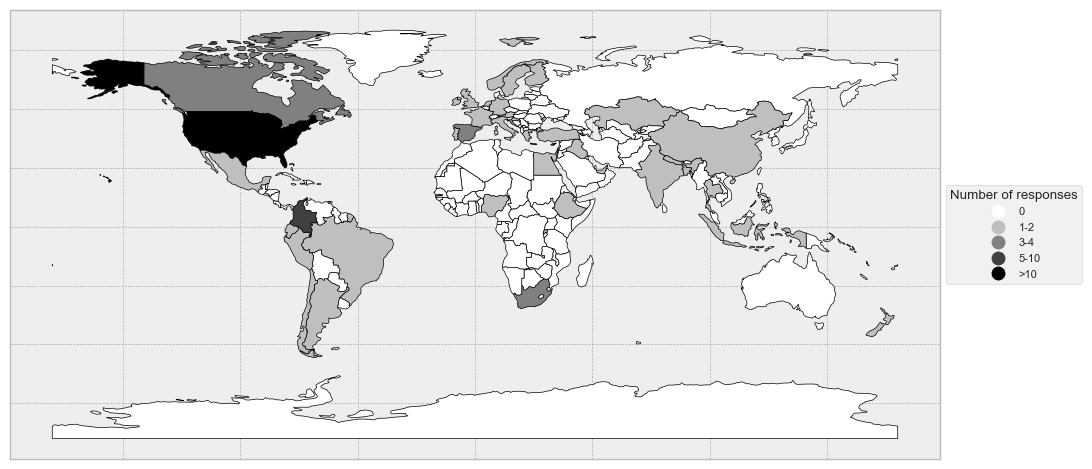

In [288]:
with plt.style.context(("bmh")):  #seaborn-v0_8-white")):
    world.plot("Responses", figsize=(12,8), edgecolor="black", 
               legend=True, legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5),
                                         'title': 'Number of responses', 
                                         'fontsize': 8,
                                         'labels': ['0', '1-2', '3-4', '5-10', '>10']},
               cmap=plt.get_cmap('gray_r', 5), scheme='User_Defined',
               classification_kwds={'bins': [0, 2, 4, 10, 55]},)
    plt.tick_params(axis='x', bottom=False, labelbottom=False)
    plt.tick_params(axis='y', left=False, labelleft=False)
    plt.show();